# Hiperparámetros

El proceso de aprendizaje de un modelo predictivo está guiado por un conjunto de parámetros internos y un conjunto de datos de entrenamiento. 

- Estos parámetros internos se llaman **hiperparámetros** 
- Son específicos para cada familia de modelos. 

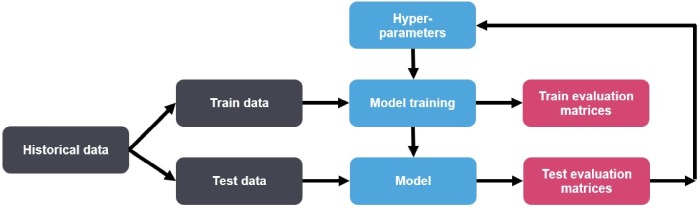

> Un conjunto específico de hiperparámetros es óptimo para un conjunto de datos específico y, por lo tanto, deben optimizarse.

In [ ]:
# conjunto de datos del censo de adultos.Solo use las características numéricas.

import pandas as pd

adult_census = pd.read_csv("../../data/adult-census-numeric/full.csv")

target_name = "class"
numerical_columns = [
    "age", "capital-gain", "capital-loss", "hours-per-week"]

target = adult_census[target_name]
data = adult_census[numerical_columns]

In [ ]:
data.head()

In [ ]:
# Creemos un modelo predictivo simple hecho de un scaler seguido de un clasificador de regresión logística.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", LogisticRegression())
])

In [ ]:
# evaluamos el rendimiento de generalización del modelo a través de la validación cruzada.

from sklearn.model_selection import cross_validate

cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Precisión a través de validación cruzada:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")


Creamos un modelo con el valor **C predeterminado, que es igual a 1 **.

Si quisiéramos usar un parámetro C diferente, podríamos haberlo hecho cuando creamos el objeto LogisticRegression con algo como `LogisticRegression(C=1e-3)`.

In [ ]:
# También podemos cambiar el parámetro de un modelo después de que se haya creado con el método set_params, que está disponible para todos los estimadores de Scikit-Learn.
# Por ejemplo, podemos establecer C=1e-3, ajustar y evaluar el modelo:

model.set_params(classifier__C=1e-3)
cv_results = cross_validate(model, data, target)
scores = cv_results["test_score"]
print(f"Precisión a través de validación cruzada:\n"
      f"{scores.mean():.3f} ± {scores.std():.3f}")

Cuando el modelo es un **pipeline**, los nombres de los parámetros tienen la forma `<model_name>__<parameter_name>` 
- (tener en cuenta el doble guión bajo). 

En nuestro caso, el clasificador proviene de la definición del pipelines y *C* es el nombre del parámetro de la LogisticRegression.

In [ ]:
# En general, se puede usar el método get_params en los modelos Scikit-Learn para enumerar todos los parámetros con sus valores.
# Por ejemplo, para obtener todos los nombres de parámetros:

for parameter in model.get_params():
    print(parameter)

In [ ]:
# Si se quiere obtener el valor de un solo parámetro, por ejemplo, classifier__C, usar:

model.get_params()['classifier__C']

In [ ]:
# Podemos variar sistemáticamente el valor de C para ver si hay un valor óptimo.

for C in [1e-3, 1e-2, 1e-1, 1, 10]:
    model.set_params(classifier__C=C)
    cv_results = cross_validate(model, data, target)
    scores = cv_results["test_score"]
    print(f"Precisión mediante validación cruzada con C={C}:\n"
          f"{scores.mean():.3f} ± {scores.std():.3f}")

**Podemos ver que mientras C sea lo suficientemente alto, el modelo parece funcionar bien.**

## **Ejercicio**

Para el dataset "house-prices/full.csv" y usando Regresión Ridge: 
- Identifica los hiperparámetros del modelo
- Encuentra el valor óptimo para alpha